In [9]:
from face_detection import YOLOv6FaceDetector
from feature_extraction import EdgeFaceFeatureExtractor
from vector_store import MilvusFaceRetriever
from PIL import Image
from IPython.display import display
from utils.image_utils import pil_to_cv2

### Loading a sample image that works both with face detection and feature extraction

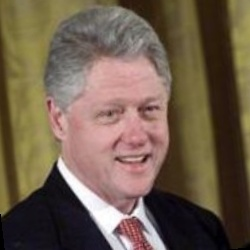

Image size:  (250, 250)


In [14]:
test_image = Image.open("./data/test_images/1.jpg")
display(test_image)
print("Image size: ", test_image.size)
cv2_test_image = pil_to_cv2(test_image)


### Profiling face detection

- os: pop-os 22.04
- hardware: 13th Gen Intel® Core™ i7-13650HX 
- model: yolov6-face nano, .onnx
- runtime: onnxruntime cpu

note: these times includes all the pre-processing (letterbox, resizing, transposing) and post-processing (coord scale, nms) operations

In [13]:
face_detector = YOLOv6FaceDetector()

%timeit face_detector.predict(cv2_test_image)

18.6 ms ± 349 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Profiling feature extraction

- os: pop-os 22.04
- hardware: 13th Gen Intel® Core™ i7-13650HX
- model: edgeface_s_gamma_05, .onnx
- runtime: onnxruntime cpu

note: these times includes all the pre-processing (resizing, transposing) operations

In [15]:
feature_extractor = EdgeFaceFeatureExtractor()

%timeit feature_extractor.predict(cv2_test_image)

2.88 ms ± 36.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Profiling feature extraction

- os: pop-os 22.04
- hardware: 13th Gen Intel® Core™ i7-13650HX
- vector_db: milvus standalone v2.4.10
- collection_size: 13,233 images, lfw funneled dataset

note: these times include the time of the query feature extraction, as well as some post-processing (filtering by threshold)

In [16]:
face_retriever = MilvusFaceRetriever(feature_extractor=feature_extractor)

%timeit face_retriever.get_search_hits(face_crop=cv2_test_image)

5.14 ms ± 62.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
